# Chapter 3: Cleaning Data

We will carry on the discussion regarding the significance of clean data since this is a crucial component of the data analysis pipeline. [Data scientists spend 60% of their time on cleaning and organizing data.](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=5f5082a26f63). While this may seem to be the least enjoyable component of this pipeline, it also the most crucial and has the utmost impact on the results. Moreover, data cleaning skills are highly valued and again requires knowledge of the context as do most of the components of this data life cycle need.

Errors in data can occur in several ways and it is important to identify and differentiate between each type of error. Firstly, one of the major problems in data can be **missing data**. This can result from some system error resulting in deletion of some data cells or a candidate missing out some fields in a survey the candidate was required to fill. In such cases, it is important to be mindful of what resulted in that data getting missed. It could either be systematic where some data types couldn't be stored as a result of some logic for eg. a field requiring data and time didn't take entries that were in the wrong format. Another reason for missing data can also be the type of question asked might impact one's privacy and could restrict people from filling out that field for eg. a survey requiring household income has missing data in a few records as candidates didn't want to submit income details to prevent any tax scrutiny. 

After identifying and categorizing what caused the data to be missing, it is important to know how to deal with it. The immediate naive approach taken is to remove the rows containing missing values or to remove an entire column if it contains several missing cells. Similarly, missing values can be imputed with statistical average of other available values in the column or imputed using a more sophisticated algorithm. However, which approach to use depends entirely on the context of the problem. It may not be a good idea to remove rows or columns since they may contain some valueable insights that we'll miss and also reduce the statistical power of our analysis due to reduction in the data size. Therefore, as mentioned above, it is important to categorize the reason behind what led to the missing values. It might be that the missing values themselves indicate a pattern that needs to be picked up by the analyst. Similarly, it may not always be a good idea to impute those missing values with an average or algorithm-generated values. This might result into certain bias and affect the integrity of the data as we are artificially inflating certain values and assuming them rather than filling them in with real observations.

Secondly, **outliers** in data can be a significant concern in the data cleaning process. Outliers are data points that are abnormally off from other values in a column. For eg. a Year of Birth column might have values before 1800 in a survey of current residents or the income of a couple of households in a zip code can be a few billions, way above the median income of the households in that zip code. It is common to have this and can be caused by an error or could reflect an actual observation. In either case, it is important to identify what caused this outlier and how to deal with it. Their presence can bias the results and lead to erroneous results. For eg. a new business trying to identify opportunites for nearby residents might want to consider the mean age of residents, hoewever, due to erroroneous input in the records with a few residents getting a Year of Birth before 1800s can inflate the mean estimate giving a wrong sense of average to the business owners.

![](https://datascience.foundation/img/pdf_images/knowing_all_about_outliers_in_machine_learning_sample_points_in_green_are_near_to_each_other.jpg)

Outliers can be dealt with by either removing those values from the dataset or by using models that are immune to any outliers. Some of the baseline models to minimize the impact of outliers could be to use median instead of mean or use density based algorithms rather than ones based on distance when making predictions (to be discussed later). However, it is still important to understand the context as these outliers can again offer some significant insights. For eg. an outlying purchase value of a credit card transaction might hint a fraudulent activity and in such a case that outlier must be highlighted and reviewed. Similalry, outliers in heart-rate metrics from a wearable device can indicate an anomaly that requires immediate medical attention.

Other forms of errors in data that are a critical part of the cleaning process include misspelled and incorrectly measured data. For eg. In a survey of residents filling out their city of origin name, many residents can spell the same city in multiple ways. A data analytics software would most probably consider them different cities. In another data collection process of oxygen level data, the data of a few subjects was misreported as they wore the tracking device on their non-dominant hand. Errors like these are hard to solve but essential to be dealt with and can take most of the data scientist's time. There is a surge of tools and packages that may help in dealing with them, for eg. some matching algorithms can assist with matching cells with similar spellings and combine them to one category. 

Another important category that is part of untidy data is irregular units and scale. It might the case that you users for a health equity venture are submitting their body mass in two different units and your system doesn't know that. Similarly, modeling data can be hard if your data is not in a linear scale i.e. your data has a pattern that is difficult to capture with a stright formula. One such example can be having a non-linear data of user time for your app. This might make it difficult to decide which features you want to release to improve the experience of your users. Some techniques such as feature scaling can be used (again with caution!) to convert the data in a column to a linear trend.

### Guided Practice

In this practice, we'll continue with the traffic stops data that we worked on in the last chapter and continue with performing data cleaning and manipulation operations. 

In [44]:
# Import data
import pandas as pd
# Note: we can import packages and alias them

stops_sliced = pd.read_csv('stops_data_sliced.csv')

In [80]:
# ignore these lines
pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Let's check the data types again
stops_sliced.dtypes

Unnamed: 0       int64
DATESTOP        object
TIMESTOP        object
DURATION         int64
CITY_I          object
STATE           object
DRRACE         float64
RESSTOP          int64
TYPEMOV        float64
BEAT_I           int64
VEHSRCHCOND      int64
VEHCONTRA        int64
VEHDRUGS         int64
VEHWEAP          int64
VEHSTOLPROP      int64
dtype: object

The read process above added an extra column to the dataset labelled '0'. We can drop it using the drop() method

In [46]:
stops_sliced.drop(columns = 'Unnamed: 0', inplace=True)
# Note: By setting inplace=True, the method applies on the dataframe
# We don't need to create a copy and assign to a new variable

As you can notice above, both DATESTOP and TIMESTOP are interpreted as object data types. Objects in pandas are a mix of text and numbers and treated differently by various models and packages. Therefore, it is useful to convert these temporal features to data types them recorgnizes them. We will see how this benefits us ahead. Pandas has a datetime object and a function to convert an entire Series to datetime format. This will enable us to perform a set of operations that are available for pandas datetime objects. We will use the [strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) to parse date and time by providng the format as an argument to the function. 

We are also interested in analyzing the data for first 3 months only, therefore, following the conversion step, we'll filter dates only between 1st Jan and 31st March of the year.

In [47]:
# Check current Data and time formats
stops_sliced[['DATESTOP','TIMESTOP']].tail(3)

,DATESTOP,TIMESTOP
377896,12/31/21,20:31
377897,12/31/21,21:33
377898,12/31/21,21:20


In [48]:
# Convert Data and time stamps using strftime format
stops_sliced['DATESTOP'] = pd.to_datetime(stops_sliced['DATESTOP'], format='%m/%d/%y')
stops_sliced['DATESTOP'].tail(2)

377897   2021-12-31
377898   2021-12-31
Name: DATESTOP, dtype: datetime64[ns]

In [81]:
# Filter date
stops_filtered = stops_sliced[stops_sliced['DATESTOP'] < '2021-04-01']
stops_filtered.tail()

,DATESTOP,TIMESTOP,DURATION,CITY_I,STATE,DRRACE,RESSTOP,TYPEMOV,BEAT_I,VEHSRCHCOND,VEHCONTRA,VEHDRUGS,VEHWEAP,VEHSTOLPROP
349193,2021-03-31,21:16,3,CHICAGO,IL,2.0,3,NaN,726,2,0,0,0,0
349194,2021-03-31,21:40,5,SAUKE VILLAGE,IL,2.0,3,2.0,231,2,0,0,0,0
349195,2021-03-31,21:04,6,CHICAGO,IL,2.0,3,6.0,1132,1,2,2,2,2
349196,2021-03-31,22:16,3,NORRIDGE,IL,1.0,3,NaN,1712,2,0,0,0,0
349197,2021-03-31,23:16,3,NAPERVILLE,IL,5.0,3,4.0,1934,2,0,0,0,0


As you can see above, we have filtered the dataframe and created a copy which only includes data before 1st April 2021. We now just have 3 months of data.

Is there anything else that you notice from the datatypes that we printed above? If you see the column DRRACE, you can see that it has a float64 data type which is a numeric data type for floating numbers as the name suggests. However, we realize that Race should be a categorical value. Keeping it to float would be infered by some models as a continuous variable and therefore will be treated as such. We will convert DRRACE to categorical data type. We will do this in 2 ways. At first we'll convert it to simple integer This is referred to as ordinal encoding where each value is mapped to a number. One key benefit of using this format is that it is an optimal way of storing values since mapped numbers will occupy less disk space. However, a caveat here is that some models will take them in an ordinal manner and consider the race mappings to be a numberical ranking. To avoid this, we would usually perform a one-hot encoding (to be discussed in chapter 5). For now, we'll just convert it to categorical format (this format is not processed by some models).

Another way to map these values would be to convert to actual string defining the race. This is not the best approach to be taken as this might take a lot of disk space. However, we'll do this as a demonstration exercise to practice mapping if we need to in some other case.

In [82]:
# Race to integers/categories
stops_filtered['DRRACE'] = stops_filtered['DRRACE'].astype('Int64').astype('category')
stops_filtered['DRRACE'].unique()
# Notice what the unique method does

[4, 2, 5, 3, 1, 6, NaN]
Categories (6, Int64): [1, 2, 3, 4, 5, 6]

In [83]:
# Mapping race (Refer to the dictionary to get the mapping)
stops_filtered['DRRACE'] = stops_filtered['DRRACE'].map({
    1: 'White',
    2: 'Black or African American',
    3: 'American Indian ot Alaska Native',
    4: 'Hispanic or Latino',
    5: 'Asian',
    6: 'Native Hawaiian or Other Pacific Islander'
})

stops_filtered['DRRACE'].unique()

['Hispanic or Latino', 'Black or African American', 'Asian', 'American Indian ot Alaska Native', 'White', 'Native Hawaiian or Other Pacific Islander', NaN]
Categories (6, object): ['White', 'Black or African American', 'American Indian ot Alaska Native', 'Hispanic or Latino', 'Asian', 'Native Hawaiian or Other Pacific Islander']

Another important component of the data cleaning process is dealing with missing values. We will check all the coluns to see the collective missing values they contain and think of ways to deal with such values. We can use pandas isna() function which returns True for every missing vaue in the dataframe. Following it with a sum() method enables us to get the count for each column as shown below.

In [84]:
stops_filtered.isna().sum()

DATESTOP           0
TIMESTOP           0
DURATION           0
CITY_I             0
STATE              0
DRRACE             4
RESSTOP            0
TYPEMOV        80196
BEAT_I             0
VEHSRCHCOND        0
VEHCONTRA          0
VEHDRUGS           0
VEHWEAP            0
VEHSTOLPROP        0
dtype: int64

The TYPEMOV column, which indicates the type of moving violation, has around 80K missing values, nearly 70% of the values are missing. We cannot remove all the 80K rows or impute them with an average. Another wy could be to remove the entire column by knowing the type of moving violation is a key variable that we cannot miss from our data. The data Dictionary tells us that TYPEMOV would be un applicable for those who weren't involved in any moving violation. This is another insight that we can get from these missing values that only 30% people were invovlved in violation. We can create a new indicator variable to mark this. We will perform this step ahead. 


But now, we'll move ahead and check for outliers in our data for continuous variables such as DURATION. The best way to check for outliers is to visualize. We will cover visualization properly in the next chapter. However, for now, just see what results do the density and boxplots produce.

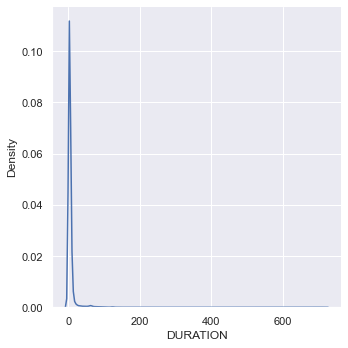

In [106]:
import seaborn as sns

sns.displot(x = stops_filtered["DURATION"], kind='kde')

In [107]:
stops_filtered["DURATION"].describe()

count    116841.000000
mean          7.791640
std          25.903847
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max         719.000000
Name: DURATION, dtype: float64

The plot above and the summary stats show us that most of the values are centered around 4 minutes with a few values going way beyond this number. the highest number we can see is around 12 hours! Depending on the situation these values might not be an error and could indicated something important about the stop made. However, while modeling, such a distribution could skew our results. You can notice the large difference between the mean and the median (50% quartile) which show the extent of the skewness. 

We can view the distribution of again but this time we'll set the bounds to only 2 standard deviations beyond the median (don't worry if you don't know the term). In other words, we'll plot a graph without the extreme values.

In [109]:
duration_sd = stops_filtered["DURATION"].std()
duration_median = stops_filtered["DURATION"].median()

In [110]:
stops_duration_2SD = stops_filtered["DURATION"][stops_filtered["DURATION"] < (duration_median + 2*duration_sd)]

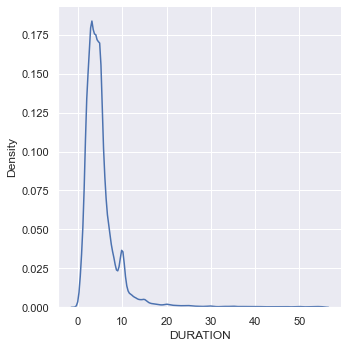

In [111]:
sns.displot(x = stops_duration_2SD, kind='kde')

In [113]:
stops_filtered.to_csv('stops_filtered.csv')

### Exercise

In this exercise you are required to complete the remaining steps of the data cleaning process by following the prompts provided below.

In [ ]:
# Convert to TIMESTOP to datetime stamp
# Hint: have a look at pandas datetime dt.time 

In [ ]:
# Check all the unique cities in the datafram

In [ ]:
# Filter out any other city apart from Chicago

In [ ]:
# Convert TYPEMOV to Category

In [ ]:
# Remove rows with missing value in DRRACE